In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
file = '../data/jla_binned_distances_31nodes_v1.txt'

# filefull = '/home/cosmocicatais/Documents/github/neuralCosmoReconstruction/data/jla_lcparams.txt'
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))
# syscov = np.loadtxt('../data/jla_v0_covmatrix.dat',skiprows=1).reshape((740,740))
# data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# data = np.loadtxt(file, usecols=[1,4], skiprows=1)
data = np.loadtxt(file, skiprows=3)
nsize = len(syscov)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)

errors = np.diag(syscov).reshape(nsize,1)
errors = np.where(errors!= 0, np.log(errors), 0)
np.shape(errors)
len(data), len(errors)

(31, 31)

In [3]:
# shuffle = [x for x in range(len(data)) if x%2 == 0]
# comp = [x for x in range(len(data)) if x%2 ==1]
# shuffle.extend(comp)

shuffle = [0,1,2,3,4,5,6,7,8,30,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]
data = data[shuffle]

errors= errors[shuffle]
len(data), len(errors), len(shuffle)

(31, 31, 31)

In [4]:
dl = data[:,1]
z = data[:,0]
np.shape(z), np.shape(dl), np.shape(errors), len(data)

((31,), (31,), (31, 1), 31)

In [5]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

zz = np.log(z)
# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))

scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
# dll = dl.reshape(nsize, 1)
# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(zz, indx)
y = np.concatenate((dll, errors), axis=1)
y_train, y_test = np.split(y, indx)
y

array([[-1.67821359, -3.84986434],
       [-1.41094551, -3.57001176],
       [-1.42159523, -5.08934053],
       [-1.34173509, -5.25237116],
       [-1.20454158, -4.91939864],
       [-1.10470264, -5.76034487],
       [-1.01425612, -5.59152573],
       [-0.87084359, -5.73770796],
       [-0.77802341, -5.73659415],
       [ 1.7504707 , -3.95445991],
       [ 1.50510788, -5.41127798],
       [ 1.23936363, -5.53630612],
       [ 1.0020969 , -6.46943751],
       [ 0.7680736 , -6.7879013 ],
       [ 0.52064013, -6.90163   ],
       [-0.67263688, -5.17672268],
       [-0.61007798, -4.75243442],
       [-0.38500516, -5.43986085],
       [-0.1472154 , -5.6290339 ],
       [ 0.08812327, -6.50827487],
       [ 0.297373  , -6.875292  ],
       [ 1.66155245, -3.73378125],
       [ 1.36977962, -5.81575656],
       [ 1.1134935 , -6.65151475],
       [ 0.87482466, -6.36312856],
       [ 0.61896267, -6.4749882 ],
       [ 0.40264632, -6.82482173],
       [ 0.16715278, -6.72268898],
       [-0.04332179,

In [6]:
def model(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
    x = Dense(100, activation='relu')(efirst)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(100, activation='relu')(x)
#     x = Dense(0, activation='relu')(x)
#     x = Dense(10, activation='relu')(x)
    elast = Dense(2,activation='linear')(x)
    return elast

batch_size = 1
epochs = 100
# epochs = 500
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 5,402
Trainable params: 5,402
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - 0s 10ms/step - loss: 14.3063 - val_loss: 13.5891
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 10.3285 - val_loss: 7.7912
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 5.9951 - val_loss: 5.2460
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 3.3642 - val_loss: 4.8778
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 4.6336 - val_loss: 4.2706
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 4.8644 - val_loss: 4.5498
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 3.1694 - val_loss: 3.9489
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 3.2130 - val_loss: 3.4460
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 2.7270 - val_loss: 2.8346
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 1.7945 - val_loss: 1.9917
Epoch

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1237 - val_loss: 0.0379
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1501 - val_loss: 0.0611
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2080 - val_loss: 0.0738
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1609 - val_loss: 0.0354
Epoch 87/100
24/24 [==============================] - ETA: 0s - loss: 0.198 - 0s 1ms/step - loss: 0.1154 - val_loss: 0.0340
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0904 - val_loss: 0.0427
Epoch 89/100
24/24 [==============================] - ETA: 0s - loss: 0.256 - 0s 1ms/step - loss: 0.1177 - val_loss: 0.0456
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2252 - val_loss: 0.0786
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0781 - val_loss: 0.1215
Epoch 92/100
24/24 [==============================] 

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

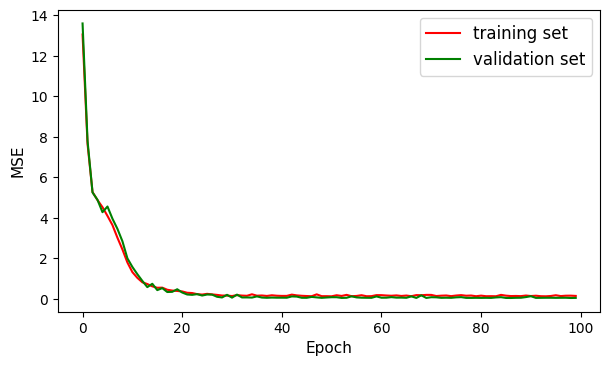

In [8]:
# plt.figure(figsize=(4, 3), dpi=100)
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [9]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]

(0.13596270978450775, 0.038419730961322784, 0.033384058624506)

In [21]:
# ranz = np.linspace(np.min(z), np.max(z), 31)
ranz = z

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
# pred_random = neural_model.predict(ranz)

pred_random = neural_model.predict(zz)
# pred_random
dlfake  = scalerdl.inverse_transform(pred_random[:,0].reshape(-1,1)).reshape(nsize,)
# dlfake = pred_random[:,0]
errfake = pred_random[:,1]                                     
# dlfake = pred_random[:,0]

In [22]:
np.shape(z), np.shape(dlfake), len(z)

((31,), (31,), 31)

In [23]:
index = np.argsort(ranz)
ranz = ranz[index]

# dlfake = dlfake.reshape(31,)[index]

# fake_data = np.stack((z, dlfake[index]), axis=1)
fake_data = np.stack((ranz, dlfake[index]), axis=1)

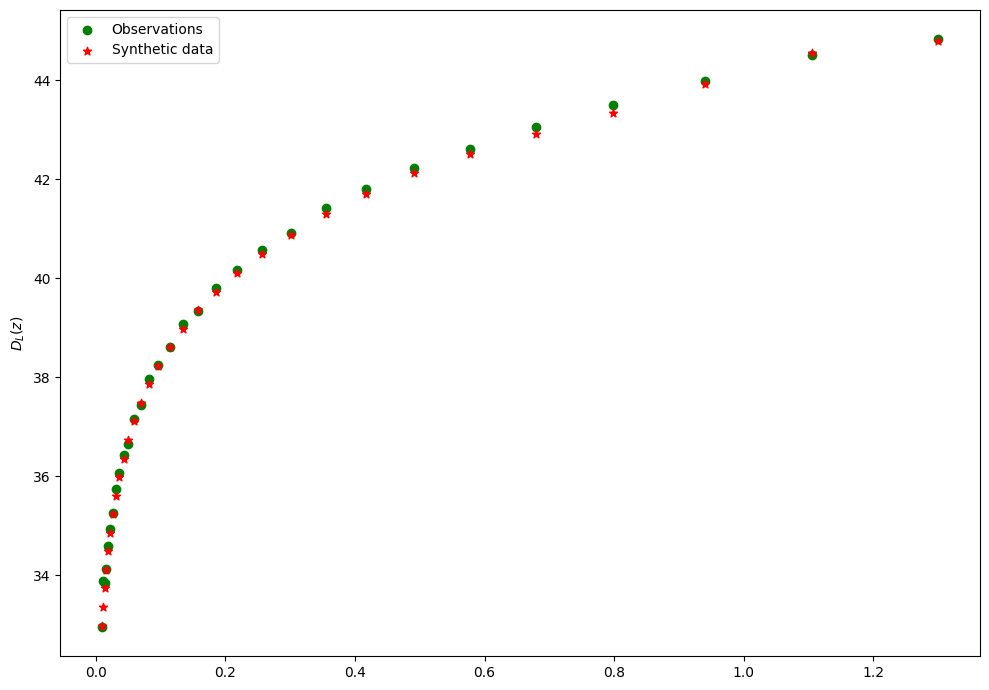

In [24]:
plt.figure(figsize=(10, 7), dpi=100)

plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(z, dlfake, c='r', label='Synthetic data', marker='*')

plt.ylabel("$D_L(z)$")
# plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [25]:
np.savetxt("fake_binned_JLA2TEST3.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [26]:
neural_model.save('../models/FFNN_JLA.h5')

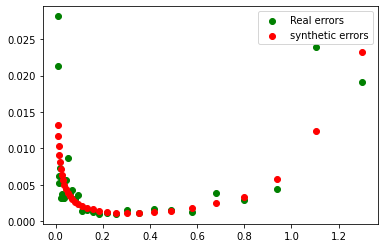

In [27]:
plt.scatter(z, np.exp(errors), c='g', label='Real errors')
plt.scatter(z, np.exp(errfake), c='r', label='synthetic errors')
plt.legend()
# Revisar negativos y usar log. 

In [28]:
z

array([0.01      , 0.01176156, 0.01383342, 0.01627025, 0.01913635,
       0.02250733, 0.02647212, 0.03113533, 0.03661999, 1.3       ,
       0.93975316, 0.67933539, 0.49108275, 0.35499736, 0.25662299,
       0.04307081, 0.05065797, 0.0700773 , 0.09694087, 0.13410237,
       0.18550944, 1.10529594, 0.79900412, 0.57758973, 0.41753213,
       0.30182857, 0.21818796, 0.15772525, 0.11401754, 0.08242181,
       0.05958165])